In [3]:
import sys
import os
from platform import python_version 
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split # randomly split data into test and train
from sklearn.ensemble import RandomForestClassifier # import classifier from sklearn 
from sklearn.neural_network import MLPClassifier  # import classifier from sklearn
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn import tree
from sklearn.preprocessing import StandardScaler, LabelEncoder

names = ['existingchecking', 'duration', 'credithistory', 'purpose', 'creditamount', 
         'savings', 'employmentsince', 'installmentrate', 'statussex', 'otherdebtors', 
         'residencesince', 'property', 'age', 'otherinstallmentplans', 'housing', 
         'existingcredits', 'job', 'peopleliable', 'telephone', 'foreignworker', 'classification']

data = pd.read_csv("data/german.data", delimiter=' ', names = names )

data.classification.replace([1,2], [1,0], inplace=True)

In [4]:
#numerical variables labels
numvars = ['creditamount', 'duration', 'installmentrate', 'residencesince', 'age', 
           'existingcredits', 'peopleliable', 'classification']

# Normilisation
numdata_std = pd.DataFrame(StandardScaler().fit_transform(data[numvars].drop(['classification'], axis=1)))

from collections import defaultdict

#categorical variables labels
catvars = ['existingchecking', 'credithistory', 'purpose', 'savings', 'employmentsince',
           'statussex', 'otherdebtors', 'property', 'otherinstallmentplans', 'housing', 'job', 
           'telephone', 'foreignworker']

d = defaultdict(LabelEncoder)

# Encoding the variable
lecatdata = data[catvars].apply(lambda x: d[x.name].fit_transform(x))

#combine data into one clean data set
data_clean = pd.concat([data[numvars], lecatdata], axis = 1)

In [5]:


# 1. Print shape of the clean data
print("Shape of the clean data:", data_clean.shape)

# 2. View the data
print(data_clean.head())


Shape of the clean data: (1000, 21)
   creditamount  duration  installmentrate  residencesince  age  \
0          1169         6                4               4   67   
1          5951        48                2               2   22   
2          2096        12                2               3   49   
3          7882        42                2               4   45   
4          4870        24                3               4   53   

   existingcredits  peopleliable  classification  existingchecking  \
0                2             1               1                 0   
1                1             1               0                 1   
2                1             2               1                 3   
3                1             2               1                 0   
4                2             2               0                 0   

   credithistory  ...  savings  employmentsince  statussex  otherdebtors  \
0              4  ...        4                4          2      

In [6]:
X_clean = data_clean.drop('classification', axis=1)
y_clean = data_clean['classification']
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean,y_clean,test_size=0.2, random_state=1)

class_names = ['Loan Refused (negative)', 'Loan Granted (positive)'] # used later to lable confusion matrices



print("Columns in X_train_clean:")
print(X_train_clean.keys())


Columns in X_train_clean:
Index(['creditamount', 'duration', 'installmentrate', 'residencesince', 'age',
       'existingcredits', 'peopleliable', 'existingchecking', 'credithistory',
       'purpose', 'savings', 'employmentsince', 'statussex', 'otherdebtors',
       'property', 'otherinstallmentplans', 'housing', 'job', 'telephone',
       'foreignworker'],
      dtype='object')


In [7]:
model = RandomForestClassifier(n_estimators=100, random_state=1, max_depth=5).fit(X_train_clean, y_train_clean)

pred_val_y = model.predict(X_test_clean)

In [8]:


# Calculate accuracy
acc = accuracy_score(y_test_clean, pred_val_y)

# Calculate F1 score
f1 = f1_score(y_test_clean, pred_val_y)

print('\nModel accuracy = ', acc)
print('Model f1 score = ', f1)


Model accuracy =  0.755
Model f1 score =  0.848297213622291


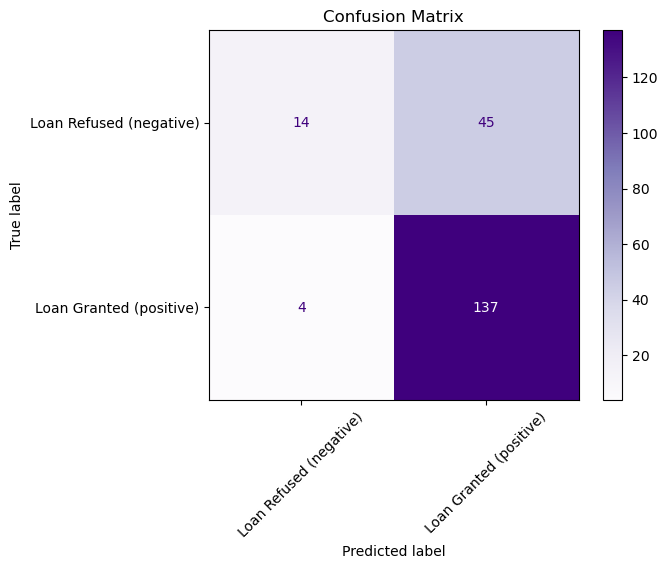

In [9]:
cm = confusion_matrix(y_test_clean, pred_val_y, labels=model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp = disp.plot(cmap='Purples',values_format = '.0f')
plt.xticks(rotation=45)
plt.title('Confusion Matrix');
plt.show()

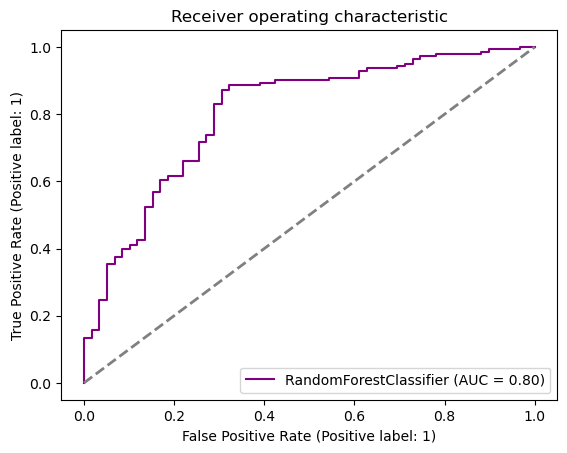

In [10]:
metrics.RocCurveDisplay.from_estimator(model, X_test_clean, y_test_clean, color='purple')

plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.title('Receiver operating characteristic')
plt.show() 

In [11]:
test_results = X_test_clean.merge(y_test_clean, left_index=True, right_index=True)
test_results['pred_Y'] = pred_val_y

def label_sex(row):
    if row['statussex'] == 0 or row['statussex'] == 2 or row['statussex'] == 3:
        return(1)
    if row['statussex'] == 1:
        return(0) 

# crete new coloumn to denote sex in results
test_results['Sex_code'] = test_results.apply (lambda row: label_sex(row), axis=1)



#1. set varible to column names that 
A = 'Sex_code'
Y_hat = 'pred_Y'
Y = 'classification'

#2. view dataframe
test_results



,creditamount,duration,installmentrate,residencesince,age,existingcredits,peopleliable,existingchecking,credithistory,purpose,...,otherdebtors,property,otherinstallmentplans,housing,job,telephone,foreignworker,classification,pred_Y,Sex_code
507,6850,15,1,2,34,1,2,1,1,0,...,0,1,2,1,3,1,0,0,1,1
818,15857,36,2,3,43,1,1,0,2,2,...,1,2,2,1,3,0,0,1,0,1
452,2759,12,2,4,34,2,1,3,0,3,...,0,1,2,1,2,0,0,1,1,1
368,3446,36,4,2,42,1,2,0,2,3,...,0,2,2,1,2,0,0,0,1,1
242,4605,48,3,4,24,2,2,0,0,1,...,0,3,2,2,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,3448,5,1,4,74,1,1,3,2,9,...,0,0,2,1,1,0,0,1,1,1
874,3590,12,2,2,29,1,2,0,2,3,...,1,1,2,1,1,0,0,1,1,1
550,996,12,4,4,23,2,1,3,4,6,...,0,0,2,1,2,0,0,1,1,0
608,2051,18,4,1,33,1,1,3,2,4,...,0,0,2,1,2,0,0,1,1,1


In [12]:


#1.count males
num_males =(test_results['Sex_code'] == 1).sum()

print('num_males',num_males)


#2. count female with one exsiting credit
num_female_credit = num_female_credit = ((test_results['Sex_code'] == 0) & (test_results['existingcredits'] == 1)).sum()

print('num_female_credit',num_female_credit)


#3. edit code to view different data columns
test_results['creditamount']



num_males 147
num_female_credit 36


507     6850
818    15857
452     2759
368     3446
242     4605
       ...  
430     3448
874     3590
550      996
608     2051
207     1424
Name: creditamount, Length: 200, dtype: int64

In [14]:
male_test_results = test_results[(test_results[A] == 1)]

female_test_results = test_results[(test_results[A] == 0)]

male_X_clean = male_test_results.drop(['classification', 'pred_Y','Sex_code'], axis=1)

female_X_clean = female_test_results.drop(['classification', 'pred_Y','Sex_code'], axis=1)



#1. calc male acc
male_acc = sum(male_test_results['classification'] == male_test_results['pred_Y']) / len(male_test_results)

#2. calc male f1
male_f1 = male_f1 = f1_score(male_test_results['classification'], male_test_results['pred_Y'])

print('\nModel accuracy (males) = ', male_acc)
print('Model f1 score (males) = ', male_f1)


Model accuracy (males) =  0.7755102040816326
Model f1 score (males) =  0.8630705394190872


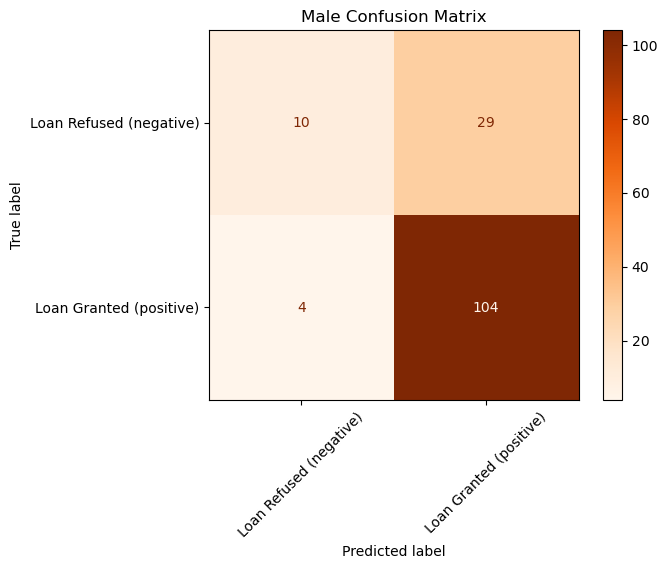

In [15]:


cm = confusion_matrix(male_test_results['classification'], male_test_results['pred_Y'], labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp = disp.plot(cmap='Oranges',values_format = '.0f')
plt.xticks(rotation=45)
plt.title('Male Confusion Matrix');
plt.show()

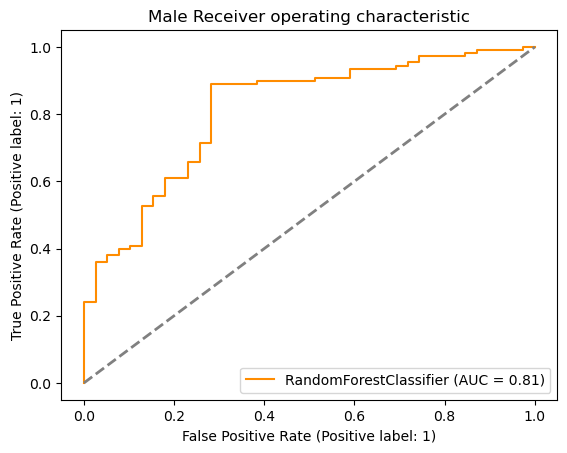

In [17]:
metrics.RocCurveDisplay.from_estimator(model, male_X_clean, male_test_results['classification'], color='darkorange')

plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.title('Male Receiver operating characteristic')
plt.show()

In [18]:
female_acc = cm = accuracy_score(female_test_results['classification'], female_test_results['pred_Y'])

female_f1 = cm = f1_score(female_test_results['classification'], female_test_results['pred_Y'])


print('\nModel accuracy (females) = ', female_acc)
print('Model f1 score (females) =', female_f1)


Model accuracy (females) =  0.6981132075471698
Model f1 score (females) = 0.8048780487804877


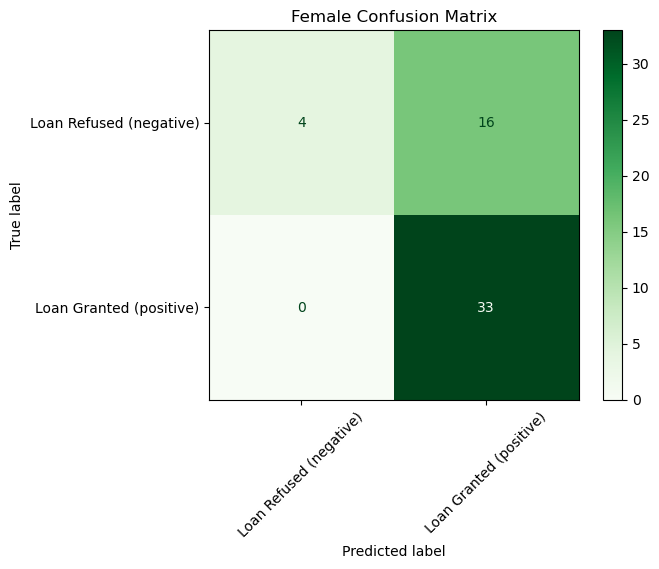

In [21]:


cm = confusion_matrix(female_test_results['classification'], female_test_results['pred_Y'], labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp = disp.plot(cmap='Greens',values_format = '.0f')
plt.xticks(rotation=45)
plt.title('Female Confusion Matrix');
plt.show()

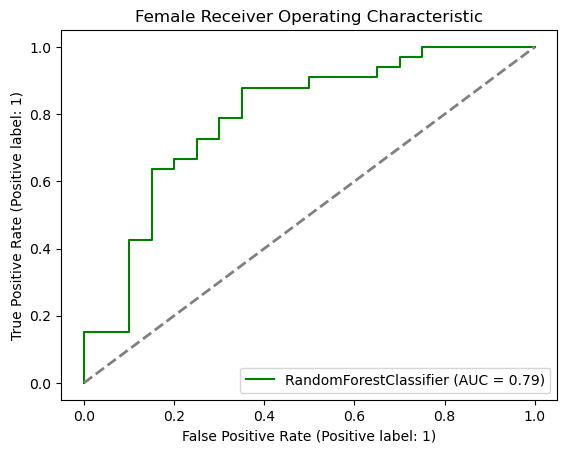

In [22]:


metrics.RocCurveDisplay.from_estimator(model, female_X_clean, female_test_results['classification'], color='green')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.title('Female Receiver Operating Characteristic')
plt.show() 

In [23]:

# 1. calc total tests
total_tests = len(test_results)

# 2. Calculate male condition positive
male_CP = male_test_results['pred_Y'].sum()
Pr_male_CP = male_CP / total_tests

# 3. Calculate female condition positive
female_CP = female_test_results['pred_Y'].sum()
Pr_female_CP = female_CP / total_tests

# 4. Calculate male condition negative
male_CN = (male_test_results['pred_Y'] == 0).sum()
Pr_male_CN = male_CN / total_tests

# 5. Calculate female condition negative
female_CN = (female_test_results['pred_Y'] == 0).sum()
Pr_female_CN = female_CN / total_tests

# 6. Check equality tests for both positive and negative conditions
demo_equal_CP = Pr_male_CP == Pr_female_CP
demo_equal_CN = Pr_male_CN == Pr_female_CN

# 7. Test for demographic parity
demo_parity = demo_equal_CP and demo_equal_CN


print('Male Condition Positive probability = ',Pr_male_CP)
print('Female Condition Positive probability = ',Pr_female_CP)
print('Male Condition Negative probability = ',Pr_male_CN)
print('Female Condition Negative probability = ',Pr_female_CN)

print('Demographic Parity for Condition Positive is:',demo_equal_CP)
print('Demographic Parity for Condition Negative is:',demo_equal_CN)
print('Demographic Parity is:',demo_parity)



Male Condition Positive probability =  0.665
Female Condition Positive probability =  0.245
Male Condition Negative probability =  0.07
Female Condition Negative probability =  0.02
Demographic Parity for Condition Positive is: False
Demographic Parity for Condition Negative is: False
Demographic Parity is: False


In [26]:


#1. complete the function input parameters
def Relax_equal(epsilon, high_group, low_group):
    '''
    This function tests for a relaxed definition of 'equal to' and returns True or False
    
    Input:
    epsilon - a number to represent percentile within which the callsifer need to perform on the lower group in comparison to the higher group
    high_group - the performance metric of the classifer on the higher (advantaged) performing group
    low_group - the performance metric of the classifer on the lower (disadvantaged) performing group
    
    Output:
    relax_equal_to - Boolean state if 'equal to' met, True or False
    '''

    #2. calc demo ratio
    relax_ratio = low_group / high_group
    
 
    
    print('Ratio ',relax_ratio)
    if relax_ratio > 1:
        print('Error: Ratio (left of eqaution) grater than one = ', relax_ratio)
        print('Ensure that the higher performing group is passed first in the parameter list, then lower performing group')
        return(None)  # NOTE None should remain in this line.

    
    
    #3. write relaxed Demogrpahic parity test
    relax_equal_to = relax_equal_to = relax_ratio >= 1 - epsilon
    
    
    #4. return test result
    return relax_equal_to




In [27]:
print('Case 1 demographic parity = ', Relax_equal(0.1 , 0.8, 0.76) )
print('Case 2 demographic parity = ', Relax_equal(0.1 , 0.88, 0.73) )
print('Case 3 demographic parity = ', Relax_equal(0.1 , 0.71, 0.65) )
print('Case 4 demographic parity = ', Relax_equal(0.1 , 0.68, 0.54) )

Ratio  0.95
Case 1 demographic parity =  True
Ratio  0.8295454545454545
Case 2 demographic parity =  False
Ratio  0.915492957746479
Case 3 demographic parity =  True
Ratio  0.7941176470588235
Case 4 demographic parity =  False


In [29]:

#1. enter value for epsilon
epsilon = 0.4

#2. call function
test_result = Relax_equal(epsilon, Pr_male_CP, Pr_female_CP)

#3. print result of test
print('Demographic parity =', test_result)


Ratio  0.3684210526315789
Demographic parity = False


In [30]:


#1. Calc postive odds for male
male_TP = male_test_results[(male_test_results['classification'] == 1) & (male_test_results['pred_Y'] == 1)].shape[0]
male_pos_odds = male_TP / male_CP if male_CP != 0 else 0

#2. Calc postive odds for female
female_TP = female_test_results[(female_test_results['classification'] == 1) & (female_test_results['pred_Y'] == 1)].shape[0]
female_pos_odds = female_TP / female_CP if female_CP != 0 else 0

#3. Calc negative odds for male
male_TN = male_test_results[(male_test_results['classification'] == 0) & (male_test_results['pred_Y'] == 0)].shape[0]
male_neg_odds = male_TN / male_CN if male_CN != 0 else 0

#4. Calc negative odds for females
female_TN = female_test_results[(female_test_results['classification'] == 0) & (female_test_results['pred_Y'] == 0)].shape[0]
female_neg_odds = female_TN / female_CN if female_CN != 0 else 0

#5. Tests for odds
equal_pos_odds = abs(male_pos_odds - female_pos_odds) < 1e-6
equal_neg_odds = abs(male_neg_odds - female_neg_odds) < 1e-6
equal_odds = equal_pos_odds and equal_neg_odds


print('male_pos_odds',male_pos_odds)
print('female_pos_odds',female_pos_odds)
print('male_neg_odd',male_neg_odds)
print('female_neg_odd',female_neg_odds)

print('Equal Positive Odds = ',equal_pos_odds)
print('Equal Negative Odds = ',equal_neg_odds)
print('Equal Odds = ',equal_odds)


male_pos_odds 0.7819548872180451
female_pos_odds 0.673469387755102
male_neg_odd 0.7142857142857143
female_neg_odd 1.0
Equal Positive Odds =  False
Equal Negative Odds =  False
Equal Odds =  False


In [33]:


equal_opp = abs(male_pos_odds - female_pos_odds) < 1e-6

# Test for equal opportunity under four fifths rule
equal_opp = Relax_equal(epsilon, male_pos_odds, female_pos_odds)


print('equal oppertuniy under four-fiths =', equal_opp)

Ratio  0.8612637362637363
equal oppertuniy under four-fiths = True


In [35]:


equal_neg = Relax_equal(0.2, female_neg_odds, male_neg_odds)
print('equal_oppertuniy under four-fiths =', equal_neg)

Ratio  0.7142857142857143
equal_oppertuniy under four-fiths = False


In [36]:
X_train_nosex = X_train_clean.copy()
X_train_nosex = X_train_nosex.drop('statussex', axis=1)

X_test_nosex = X_test_clean.copy()
X_test_nosex = X_test_nosex.drop('statussex', axis=1)


print(X_train_nosex.columns)


Index(['creditamount', 'duration', 'installmentrate', 'residencesince', 'age',
       'existingcredits', 'peopleliable', 'existingchecking', 'credithistory',
       'purpose', 'savings', 'employmentsince', 'otherdebtors', 'property',
       'otherinstallmentplans', 'housing', 'job', 'telephone',
       'foreignworker'],
      dtype='object')


In [37]:
#Train the no sex model
model_nosex = RandomForestClassifier(n_estimators=100, random_state=1, max_depth=5).fit(X_train_nosex, y_train_clean)

# Test the no sex model
pred_val_y_nosex = model_nosex.predict(X_test_nosex)


# save the no sex predictions to the test_results dataframe
test_results['pred_Y_nosex'] = pred_val_y_nosex

 
# create seperate male and female data sets
male_test_results_nosex = test_results[(test_results[A] == 1)].copy()
female_test_results_nosex = test_results[(test_results[A] == 0)].copy()

male_X_clean_nosex = male_test_results.drop(['classification', 'pred_Y','Sex_code', 'statussex'], axis=1)
female_X_clean_nosex = female_test_results.drop(['classification', 'pred_Y','Sex_code', 'statussex'], axis=1)



In [38]:


#1. set Y_hat column
Y_hat = test_results['pred_Y_nosex'] 


#2. calc accuracy score
male_nosex_acc = male_nosex_acc = (test_results[test_results['Sex_code'] == 1]['classification'] == test_results[test_results['Sex_code'] == 1]['pred_Y_nosex']).mean()

print('\nModel accuracy (males) = ', male_nosex_acc)

#. 3 calc f1 score 
male_nosex_f1 = f1_score(test_results.loc[test_results['Sex_code'] == 1, 'classification'], test_results.loc[test_results['Sex_code'] == 1, 'pred_Y_nosex'])

print('Model f1 score (males) = ', male_nosex_f1)




Model accuracy (males) =  0.782312925170068
Model f1 score (males) =  0.8666666666666665


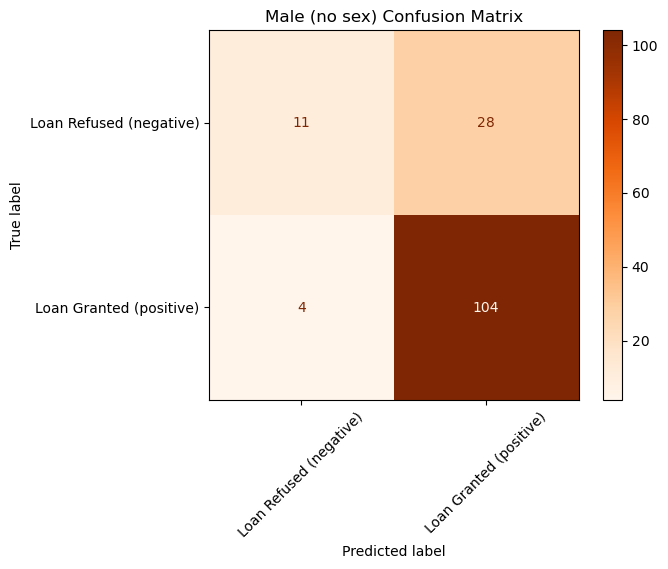

In [39]:


#1. calc confusion matrix
cm = confusion_matrix(test_results[test_results['Sex_code'] == 1]['classification'], test_results[test_results['Sex_code'] == 1]['pred_Y_nosex'], labels=model_nosex.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp = disp.plot(cmap='Oranges',values_format = '.0f')
plt.xticks(rotation=45)
plt.title('Male (no sex) Confusion Matrix');
plt.show()

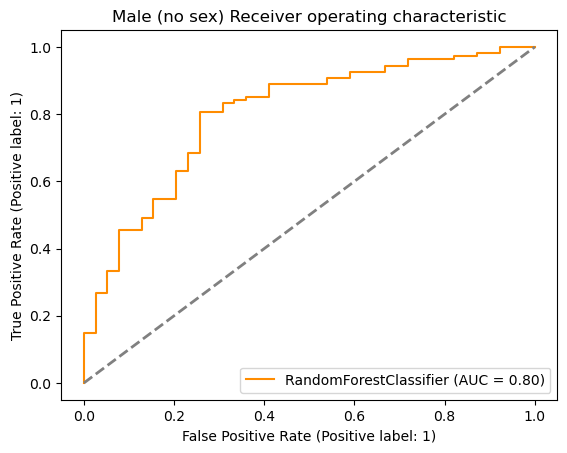

In [41]:
#1. calc roc
metrics.RocCurveDisplay.from_estimator(model_nosex, X_test_nosex[test_results['Sex_code'] == 1], test_results[test_results['Sex_code'] == 1]['classification'], color='darkorange')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.title('Male (no sex) Receiver operating characteristic')
plt.show()

In [44]:


#1. calc acc
female_nosex_acc = accuracy_score(test_results[test_results['Sex_code'] == 0]['classification'], test_results[test_results['Sex_code'] == 0]['pred_Y_nosex'])

print('\nModel accuracy (females) = ', female_nosex_acc)

#2. cacl f1 score
female_nosex_f1 = f1_score(test_results[test_results['Sex_code'] == 0]['classification'], test_results[test_results['Sex_code'] == 0]['pred_Y_nosex'])

print('Model f1 score (females) = ', female_nosex_f1)




Model accuracy (females) =  0.6792452830188679
Model f1 score (females) =  0.7901234567901234


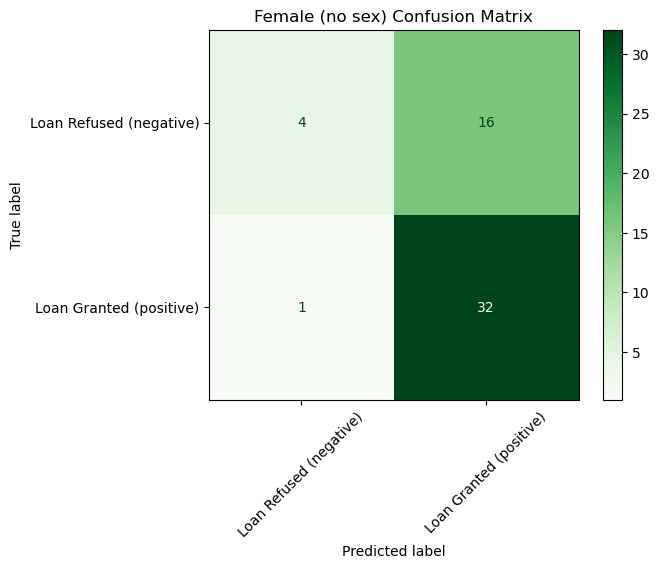

In [45]:


#1. calc confusion matrix
cm = confusion_matrix(test_results[test_results['Sex_code'] == 0]['classification'], test_results[test_results['Sex_code'] == 0]['pred_Y_nosex'], labels=model_nosex.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp = disp.plot(cmap='Greens',values_format = '.0f')
plt.xticks(rotation=45)
plt.title('Female (no sex) Confusion Matrix');
plt.show()

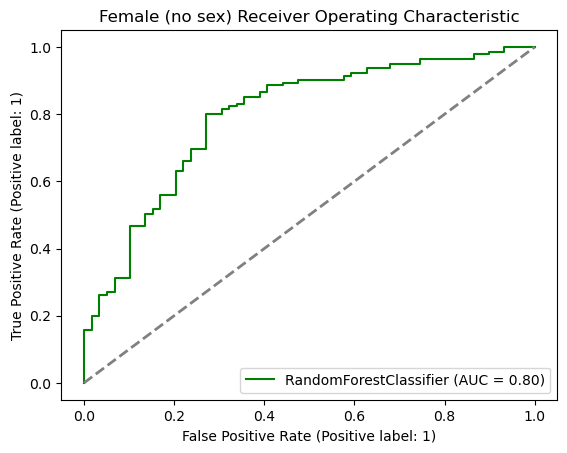

In [48]:

#1. calc ROC
metrics.RocCurveDisplay.from_estimator(model_nosex, X_test_nosex, y_test_clean, color='green')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.title('Female (no sex) Receiver Operating Characteristic')
plt.show() 

In [49]:


#1. Calculate male CP
male_nosex_CP = len(test_results[(test_results['Sex_code'] == 1) & (test_results['pred_Y_nosex'] == 1)])
Pr_male_nosex_CP = male_nosex_CP / total_tests

#2. Calculate female CP
female_nosex_CP = len(test_results[(test_results['Sex_code'] == 0) & (test_results['pred_Y_nosex'] == 1)])
Pr_female_nosex_CP = female_nosex_CP / total_tests

#3. Test for parity under four-fifths
nosex_demo_parity = Relax_equal(epsilon, Pr_male_nosex_CP, Pr_female_nosex_CP)
print('Pr_male_nosex_CP',Pr_male_nosex_CP)
print('Pr_female_nosex_CP',Pr_female_nosex_CP)
print('Demographic Parity =',nosex_demo_parity)

Ratio  0.3636363636363636
Pr_male_nosex_CP 0.66
Pr_female_nosex_CP 0.24
Demographic Parity = False


In [51]:

# Calculate male pos odds
male_nosex_TP = len(test_results[(test_results['Sex_code'] == 1) & (test_results['classification'] == 1) & (test_results['pred_Y_nosex'] == 1)])
male_nosex_pos_odds = male_nosex_TP / male_nosex_CP

# Calculate female pos odds
female_nosex_TP = len(test_results[(test_results['Sex_code'] == 0) & (test_results['classification'] == 1) & (test_results['pred_Y_nosex'] == 1)])
female_nosex_pos_odds = female_nosex_TP / female_nosex_CP

# Test for equal opportunity under four-fifths
nosex_equal_opp = Relax_equal(epsilon, male_nosex_pos_odds, female_nosex_pos_odds)

print('male_nosex_pos_odds',male_nosex_pos_odds)
print('female_nosex_pos_odds',female_nosex_pos_odds)
print('Equal Oppertuniy (no sex) =', nosex_equal_opp)

Ratio  0.8461538461538461
male_nosex_pos_odds 0.7878787878787878
female_nosex_pos_odds 0.6666666666666666
Equal Oppertuniy (no sex) = True


In [52]:

test_results[test_results['pred_Y'].notnull() & test_results['pred_Y_nosex'].notnull() & (test_results['pred_Y'] != test_results['pred_Y_nosex'])]


,creditamount,duration,installmentrate,residencesince,age,existingcredits,peopleliable,existingchecking,credithistory,purpose,...,property,otherinstallmentplans,housing,job,telephone,foreignworker,classification,pred_Y,Sex_code,pred_Y_nosex
17,8072,30,2,3,25,3,1,0,0,9,...,2,0,1,2,0,0,1,1,1,0
189,3244,18,1,4,33,2,1,1,0,3,...,2,0,1,2,1,0,1,1,0,0
711,1198,6,4,4,35,1,1,0,1,7,...,3,2,2,2,0,0,0,0,0,1
597,4241,24,1,4,36,3,1,1,0,9,...,0,2,1,1,1,0,0,1,1,0
216,3104,18,3,1,31,1,1,0,0,9,...,1,0,1,2,1,0,1,0,1,1
783,836,12,4,2,23,1,1,1,2,0,...,1,0,1,1,0,0,0,1,0,0


In [56]:


test_results[
    (test_results['pred_Y'].notnull()) & 
    (test_results['pred_Y_nosex'].notnull()) & 
    (test_results['pred_Y'] != test_results['pred_Y_nosex']) &
    (test_results['pred_Y_nosex'] == test_results['classification'])
]



,creditamount,duration,installmentrate,residencesince,age,existingcredits,peopleliable,existingchecking,credithistory,purpose,...,property,otherinstallmentplans,housing,job,telephone,foreignworker,classification,pred_Y,Sex_code,pred_Y_nosex
597,4241,24,1,4,36,3,1,1,0,9,...,0,2,1,1,1,0,0,1,1,0
216,3104,18,3,1,31,1,1,0,0,9,...,1,0,1,2,1,0,1,0,1,1
783,836,12,4,2,23,1,1,1,2,0,...,1,0,1,1,0,0,0,1,0,0
